In [1]:
import os
import math
import pandas as pd
import numpy as np
from dask import dataframe as dd
import graphlab
import graphlab as gl
import graphlab.aggregate as agg

In [4]:
path = '/home/zongyi/bimbo_data/'

sf = gl.SFrame.read_csv(path+'train.csv', verbose=False)
# prom = gl.SFrame.read_csv('/Users/zonemercy/jupyter_notebook/bimbo_data/prom_prod.csv', verbose=False)
# cluster = gl.SFrame.read_csv('/Users/zonemercy/jupyter_notebook/bimbo_data/prod_cluster.csv', verbose=False)
# prod = gl.SFrame.read_csv('/Users/zonemercy/jupyter_notebook/bimbo_data/preprocessed_products.csv', verbose=False)
# state = gl.SFrame.read_csv('/Users/zonemercy/jupyter_notebook/bimbo_data/town_state.csv', verbose=False)

---

## price change

In [18]:
sf['Demada_log'] = sf['Demanda_uni_equil'].apply(lambda x: math.log(x+1))
sf['price'] = sf['Venta_hoy'] / sf['Venta_uni_hoy'] #plus 1

In [22]:
sf = sf[['Producto_ID', 'price']]
sf = sf.groupby(key_columns=['Producto_ID'], operations={'price':agg.MEAN('price')})
sf.save(path+'price.csv',format='csv')

In [16]:
'''random choice prod'''
pid = sf[int(np.random.choice(len(sf), 1))]['Producto_ID']
rpid = sf[sf['Producto_ID'] == pid]

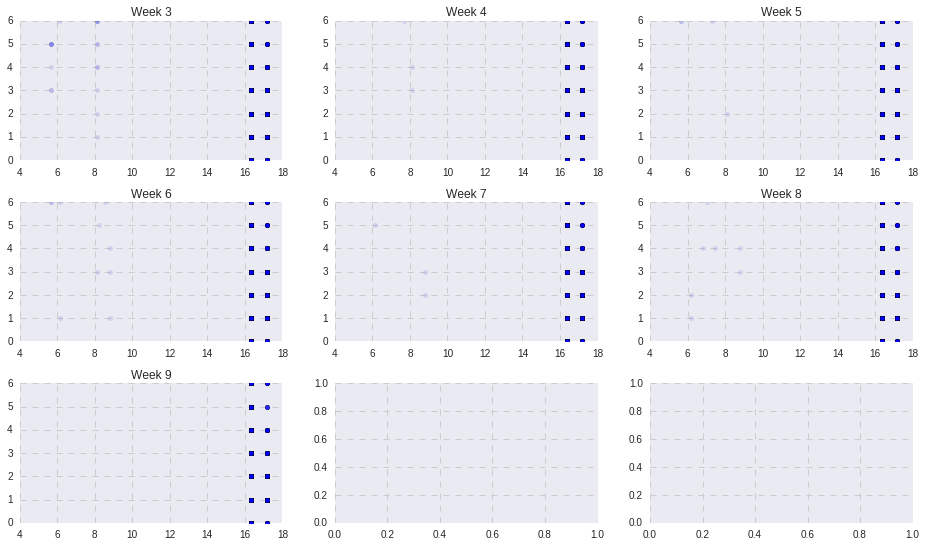

In [17]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'grid.color': '.8','grid.linestyle': u'--'}) 
%matplotlib inline

figsize(16, 9)
fig, axs = plt.subplots(3, 3)
fig.subplots_adjust(hspace = .3) #, wspace=.1)

data = np.arange(3, 10)
for ax, d in zip(axs.ravel(), data):
    ax.scatter(rpid[rpid['Semana']==d]['price'], 
             rpid[rpid['Semana']==d]['Demanda_uni_equil'],alpha=.1)
    ax.set_title('Week '+str(d))
    ax.set_ylim([0,6])

---
## 查找noise

In [113]:
rpid[(rpid['price']<4) & (rpid['Demada_log']>1)]

Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima
3,22090,1,900,2186302,47840,7,24.22,0
3,22090,1,900,2191379,47840,41,141.86,0
3,22090,1,900,2354188,47840,11,38.06,0
3,22090,1,900,2460792,47840,13,44.98,0
3,22187,1,900,956730,47840,6,20.76,0
3,22187,1,900,2037196,47840,3,10.38,0
3,22187,1,900,2259215,47840,2,6.92,0
3,22362,1,900,1327215,47840,9,32.62,0
3,22362,1,900,1483356,47840,4,18.28,0
3,22414,1,900,4397089,47840,2,6.92,0


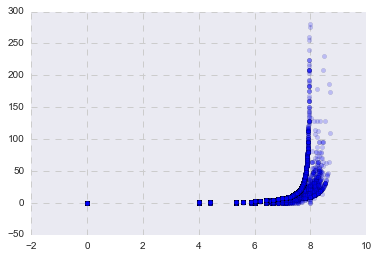

In [112]:
'''去除 Ruta_SAK 900'''

# x = rpid['price']
# y = rpid['Demanda_uni_equil']
x = rpid[rpid['Ruta_SAK'] != 900]['price']
y = rpid[rpid['Ruta_SAK'] != 900]['Demanda_uni_equil']

plt.scatter(x, y, alpha=0.2)
plt.show()